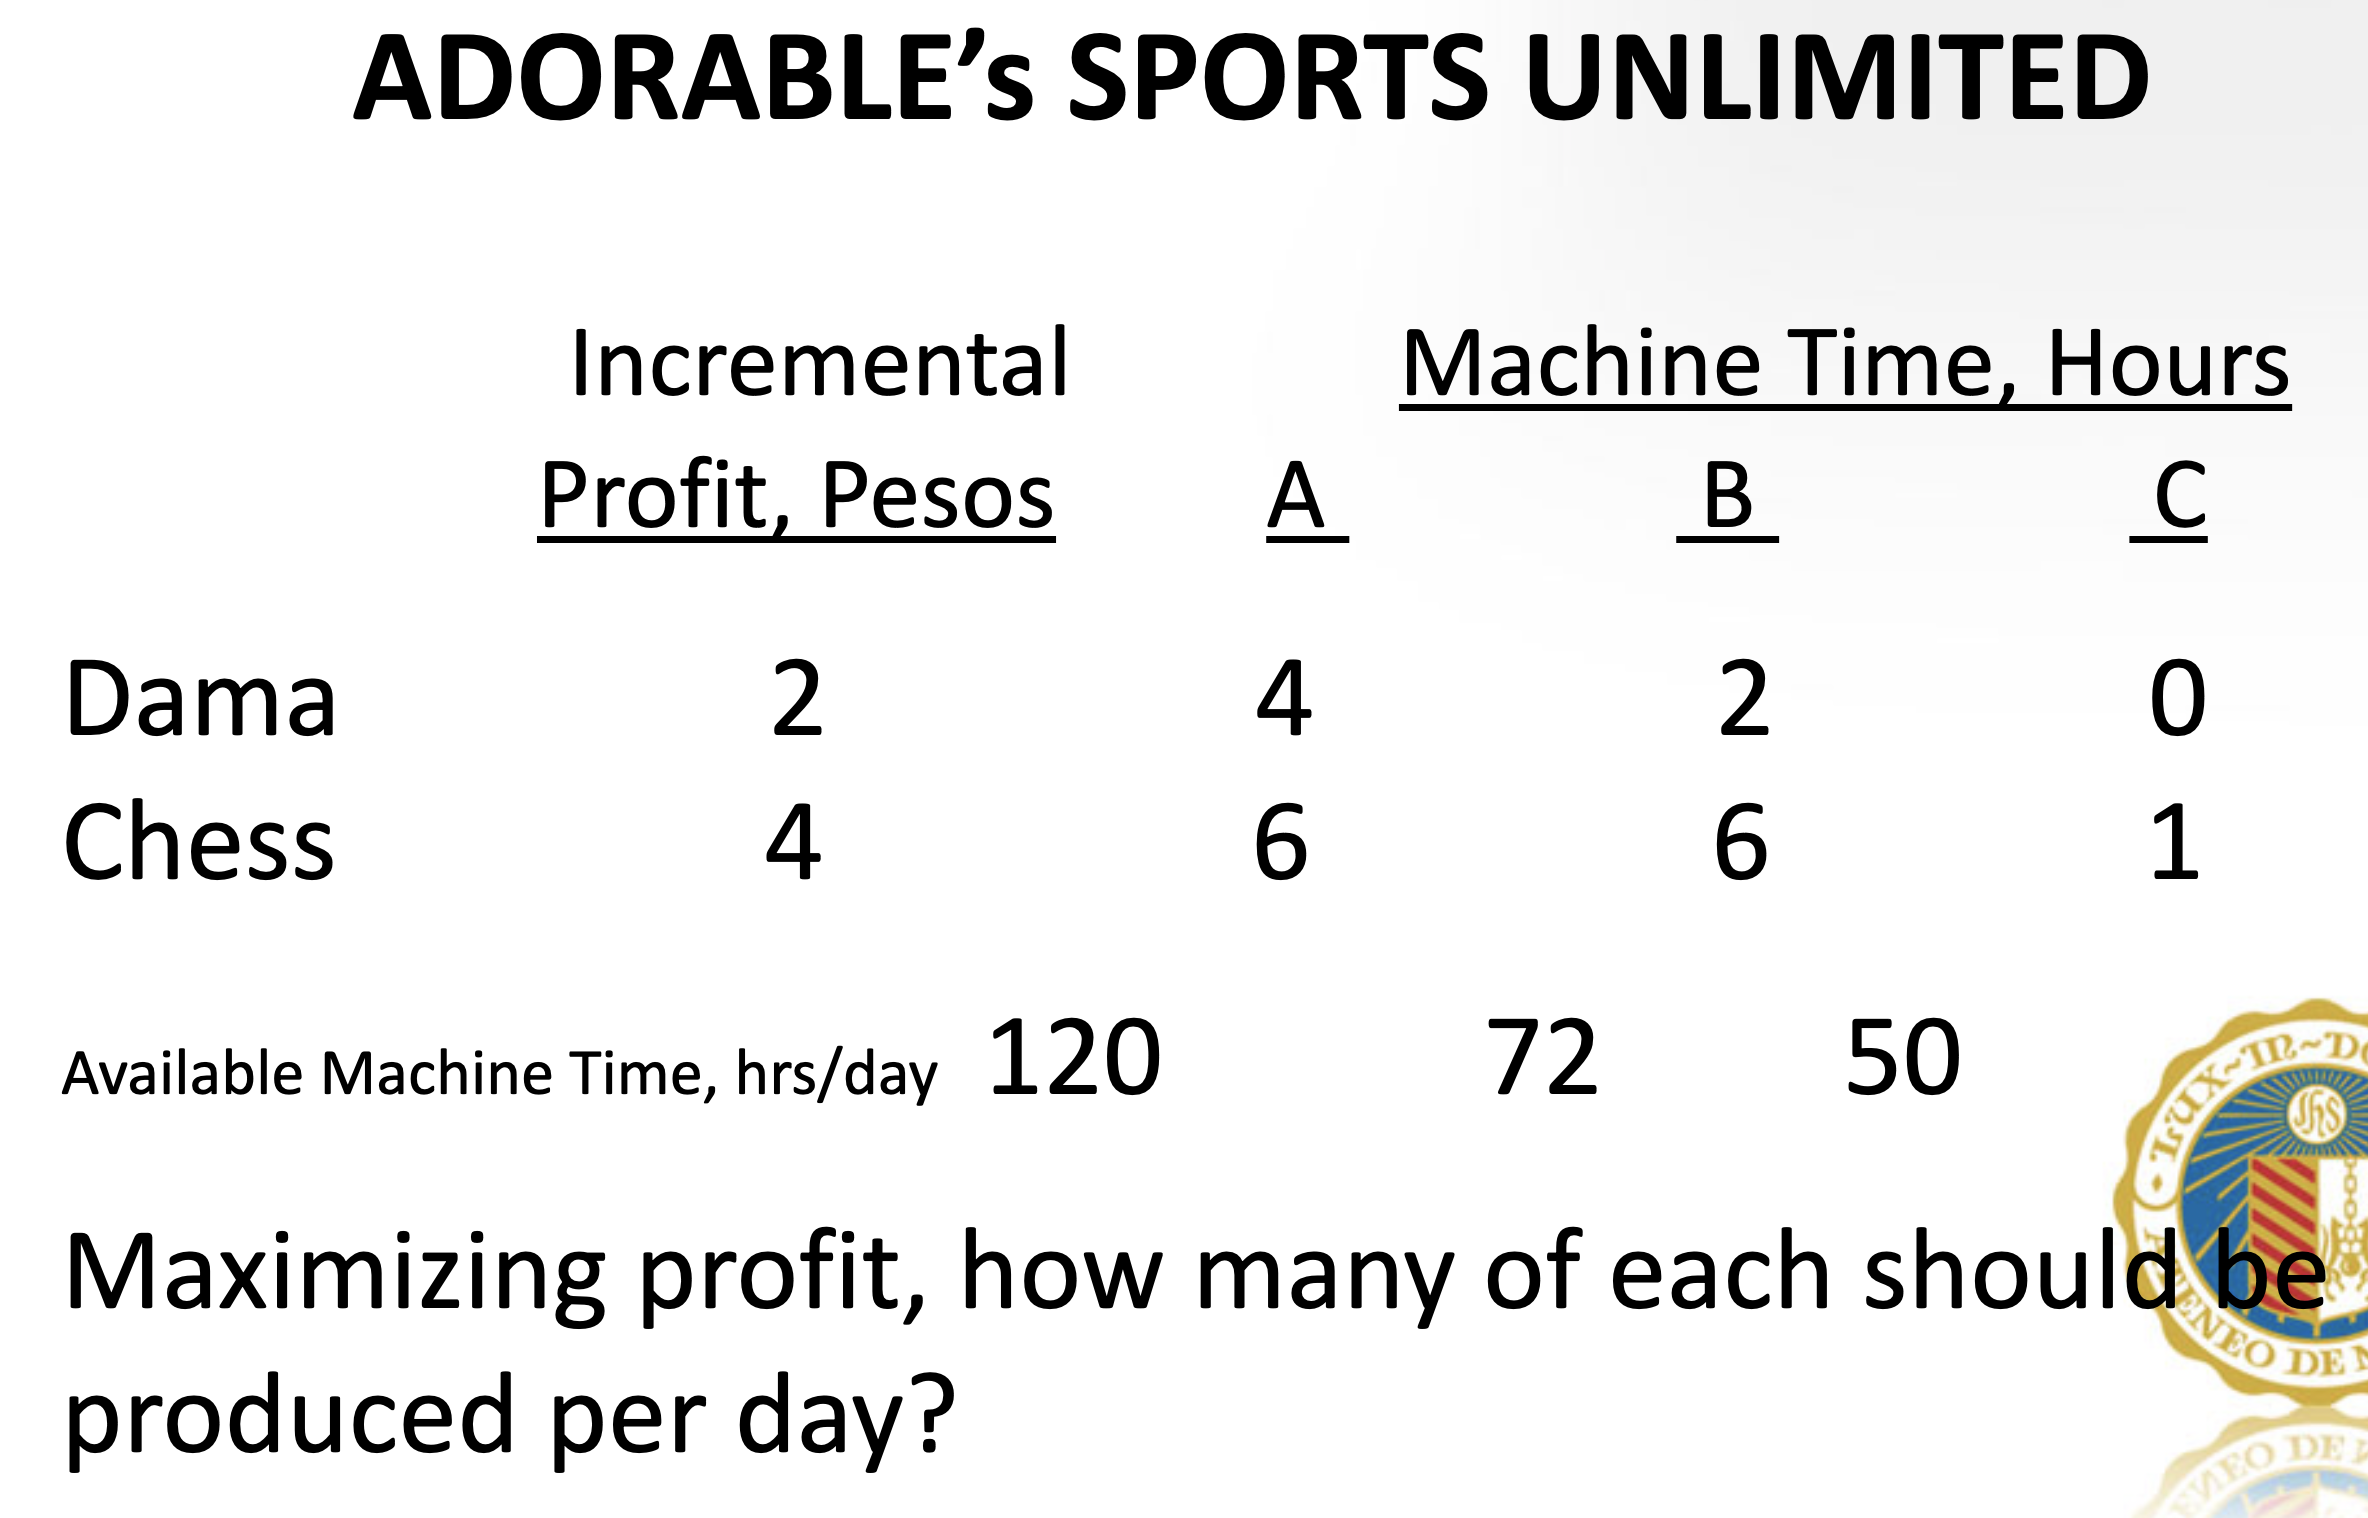

In [3]:
from pulp import *
import pandas as pd

In [4]:
profitdf = pd.DataFrame({'Variable': ['Dama', 'Chess'],
                   'IncrementalProfit': [2, 4]
                    })

machinetimedf = pd.DataFrame({'Variable': ['Dama', 'Chess', 'AvailableMachineTime'],
                   'A': [4, 6, 120],
                   'B': [2, 6, 72],
                   'C': [0, 1, 50],
                   })

print(profitdf)
print(machinetimedf)

  Variable  IncrementalProfit
0     Dama                  2
1    Chess                  4
               Variable    A   B   C
0                  Dama    4   2   0
1                 Chess    6   6   1
2  AvailableMachineTime  120  72  50


In [13]:
# Initialize the LP
prob = LpProblem('LP Excercise Slide', LpMaximize)

# Decision Variables
x1 = LpVariable('Dama', lowBound=0, cat='Integer')
x2 = LpVariable('Chess', lowBound=0, cat='Integer')

# Objective Function
prob += 2 * x1 + 4 * x2 # Max Profit

# Add Constraints
prob += 4 * x1 + 6 * x2 <= 120, 'Machine A'
prob += 2 * x1 + 6 * x2 <= 72, 'Machine B'
prob += 0 * x1 + 1 * x2 <= 50, 'Machine C'
print(prob)

# Solve the problem
status = prob.solve()
print(f"Status: {LpStatus[status]}")

#Display variables
print("Optimal production Strategy")
for var in prob.variables():
    print(f"{var.name}: {var.varValue} machines")

#Display objective
max_profit = value(prob.objective) # 64
print(f"Max Profit: {max_profit} PHP")

LP_Excercise_Slide:
MAXIMIZE
4*Chess + 2*Dama + 0
SUBJECT TO
Machine_A: 6 Chess + 4 Dama <= 120

Machine_B: 6 Chess + 2 Dama <= 72

Machine_C: Chess <= 50

VARIABLES
0 <= Chess Integer
0 <= Dama Integer

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/jason/Documents/GitHub/naut/quantitative_analysis/env/lib/python3.10/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/fb/p1td_8397cg27vvh9njm_gtm0000gn/T/ce737a60f1fd4eea84cfaf6c71a5c3c4-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/fb/p1td_8397cg27vvh9njm_gtm0000gn/T/ce737a60f1fd4eea84cfaf6c71a5c3c4-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 8 COLUMNS
At line 20 RHS
At line 24 BOUNDS
At line 27 ENDATA
Problem MODEL has 3 rows, 2 columns and 5 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 64 - 0.00 seconds
Cgl0004I processed model 